In [1]:
import sys # delete after finish
sys.path.append('..') # delete after finish

from seismicpro import Survey, Gather
import matplotlib.pyplot as plt

### Gather Tutorial

The Tutorial contains general information about the Gather class, helpful attributes and some useful methods. <br>

Gather tutorial is simple way to intoduce you with the Gather class. Also, it tell you about attributes and some helpfulmethods. <br>
You rescue disclose the Gather and Survey classes dependence. It is for that reason I highly recomend to examine the [Survey Tutorial](#link) first. <br>
After studying of the Gather Tutorail you could create the Gather object, learn about it structure and make base seismic data processing.

Tutorial reading takes N minutes.

### Content

[Intro](#Intro) <br>
[Starting](#Starting) <br>
[Attributes](#Attributes) <br>
[General Methods](#General-Methods)<br>
[Normalization Methods](#Normalization-Methods) <br>
[Muting](#Muting) <br>
[Conclusion](#Conclusion) <br>

In [2]:
import sys # delete after finish
sys.path.append('..') # delete after finish

from seismicpro import Survey
import matplotlib.pyplot as plt

### Intro

We use Survey class for make simple image of SEG-Y file. This image don't contain any trace data, only trace headers.
For trace data extraction we use the Gather class.

Gather class load needful information about SEG-Y file from Survey class, such as headers, path to seg-y file etc. After load the trace data from the SEG-Y file.
Gather load trace data only for indicated `header_index` value. That's important point, because the header_index specify when the Survey class are created.

Why we dont load trace data with Survey class?
SEG-Y files could be very-very huge. Better way is to work with the meaningful chunk. That's what makes Gather class.

### Starting
You will get to know two methods of the creation a Gather class example and learn about Gather structure.

We need to create the Survey class first. All same as in Survey tutorial.


In [3]:
sgy_path = './data/small_survey.sgy'
header_cols = ["TraceNumber", "offset", 'CDP'] # порезать до необходимого минимума
survey = Survey(sgy_path, header_index='FieldRecord', header_cols=header_cols)

1


Tell about viewed information. Point on `Index name` and `Index value`

(!) tips <br>
Gather statistics auto calcs when `info()` called 

#### get_gather

получаем список уникальных индексов

In [4]:
survey.headers.index.drop_duplicates()

Int64Index([111916, 111917, 111918, 111919, 111920], dtype='int64', name='FieldRecord')

Объясняем метод `get_gather`

In [5]:
gather = survey.get_gather(index=111918, limits=(0,3000)) # limits remove maybe...
gather.info()


Parent survey path:          ./data/small_survey.sgy
Parent survey name:          small_survey

Number of traces:            1728
Trace length:                3000 samples
Sample rate:                 2.0 ms
Times range:                 [0.0 ms, 5998.0 ms]
Offsets range:               [79 m, 4914 m]

Index name(s):               FieldRecord
Index value:                 111918
Gather sorting:              None

Gather statistics:
Number of dead traces:       3
mean | std:                        0.00 | 0.51      
 min | max:                      -30.30 | 21.94     
 q01 | q99:                       -1.59 | 1.60      



<b> Notes </b>
если в Сюрвее есть лимиты, то они же будут в Gather

#### samle_gather

Now we could create Gather class by using 

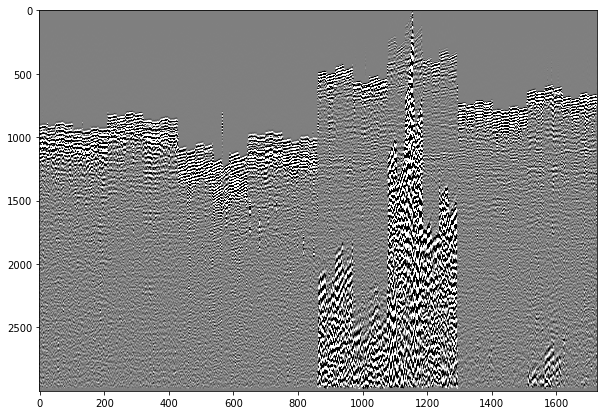

In [6]:
gather = survey.sample_gather()
gather.plot() #show here

Let's see information about the created class object

In [7]:
gather.info()


Parent survey path:          ./data/small_survey.sgy
Parent survey name:          small_survey

Number of traces:            1728
Trace length:                3000 samples
Sample rate:                 2.0 ms
Times range:                 [0.0 ms, 5998.0 ms]
Offsets range:               [79 m, 4914 m]

Index name(s):               FieldRecord
Index value:                 111918
Gather sorting:              None

Gather statistics:
Number of dead traces:       3
mean | std:                        0.00 | 0.51      
 min | max:                      -30.30 | 21.94     
 q01 | q99:                       -1.59 | 1.60      



Now we learn how to create `Gather`

### Attributes

Let discuss about most useful attributes of Survey class

<b>`headers`</b> - хэддеры берем из Survey для каждой каждой трасы, попавшей в Gather. <br>

In [8]:
gather.headers

,offset,TraceNumber,CDP,INLINE_3D,CROSSLINE_3D,TRACE_SEQUENCE_FILE
FieldRecord,,,,,,
111918,3266,326,2057118,1552,492,8062
111918,3274,1722,2128822,1606,592,8070
111918,3274,1591,2128691,1606,461,8069
111918,3273,239,2049219,1546,549,8068
111918,3273,194,2049174,1546,504,8067
...,...,...,...,...,...,...
111918,2276,662,2073078,1564,540,7483
111918,2276,635,2073051,1564,513,7482
111918,2275,1702,2128802,1606,572,7481


<b>`data`</b> - trace data, numpy array with shape [Number of traces, Trace length]

In [9]:
gather.data

array([[ 1.4331881e-06,  1.0170324e-06, -5.3215190e-06, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 5.5239143e-06,  2.2677312e-05,  2.0792519e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-3.2445841e-06, -1.4343628e-05, -1.9693107e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  4.4375739e-09, -1.4841646e-07, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.5269310e-05, -3.3778138e-04, -7.4959965e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.3256914e-05,  1.9857907e-05,  1.4473521e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [10]:
gather.data.shape

(1728, 3000)

<b>`samples`</b> - array of samples with appropriate intervals, ms

In [11]:
gather.samples

array([0.000e+00, 2.000e+00, 4.000e+00, ..., 5.994e+03, 5.996e+03,
       5.998e+03], dtype=float32)

<b>`sample_rate` </b> - time resolution of traces, ms

In [12]:
gather.sample_rate

2.0

We learned about the main attributes of Gather class

`sort_by` и `mask` 
прописывать в методах 

mask using in picking tasks only

### General Methods

General methods

#### <i>plot </i>

show gather information

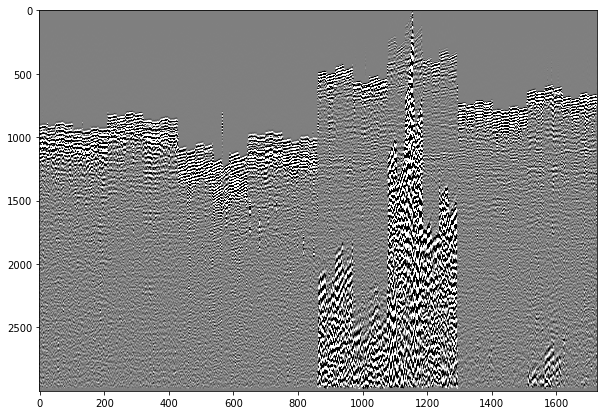

In [13]:
#gather = survey.sample_gather().sort(by='offset') # descent?
gather.plot()

#### <i>sort </i>

sort the traces in gather by headers

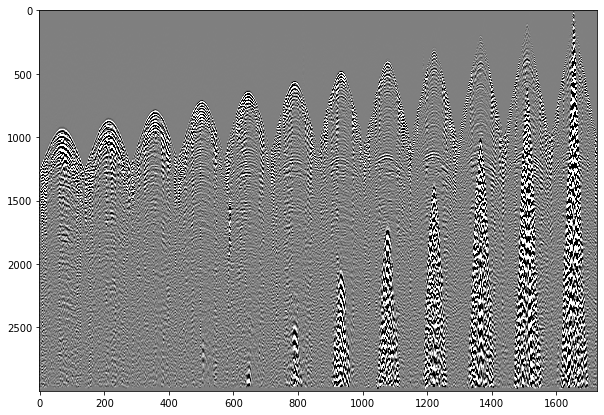

In [14]:
gather = survey.sample_gather().sort(by='CDP')
gather.plot()

добавляет атрибут `sort_by`

In [15]:
gather.sort_by

'CDP'

#### <i>copy </i>

make copy of the gather

Нужно ли сравнение копии и оригинала?
Полезный метод, т.к. все методы работают inplace

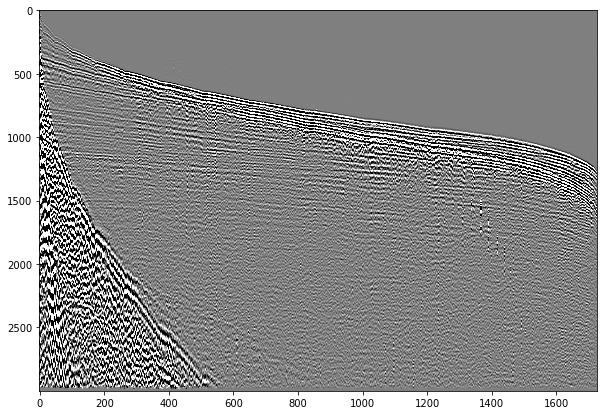

In [16]:
gather_copy = gather.copy()
gather.sort(by='offset')
gather.plot()

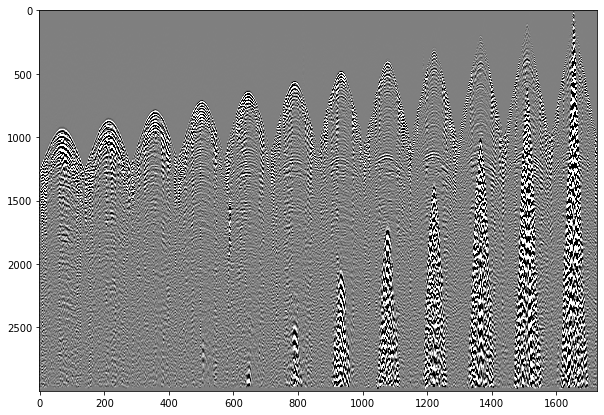

In [17]:
gather_copy.plot()

#### <i>dump </i>

save gather as file in SEG-Y format

In [18]:
gather.dump(path='./data/', name='test_gather') 

Tell about `name` and `copy_header` params

### Normalization Methods

возможно переименовать. Например Data Processing

#### <i>scale_standard </i>

Приведение значений трасс к среднему 0 и дисперсии 1

All methods works inplace. I use copy to show you how methods work on the base `Gather`.

In [19]:
gather_scaled = gather.copy()

gather_scaled.scale_standard()
print(f'Mean of all trace is {gather_scaled.data.mean():.2f}')
print(f'Standart deviation of all trace is {gather_scaled.data.std():.2f}')

Mean of all trace is -0.00
Standart deviation of all trace is 1.00


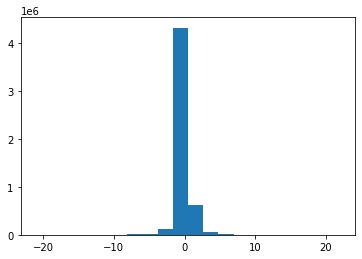

In [20]:
_ = plt.hist(gather_scaled.data.ravel(), bins=20)

Calculating statistics for survey small_survey:   0%|          | 0/8640 [00:00<?, ?it/s]

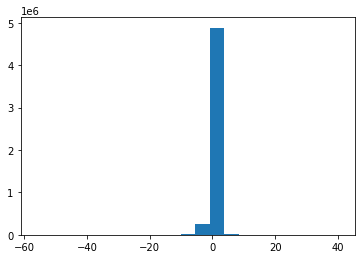

In [21]:
gather_scaled = gather.copy()
survey.collect_stats()
gather_scaled.scale_standard(use_global=True)
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

#### <i>scale_maxabs </i>gather.scale_standard()
gather.info()

In [22]:
gather_scaled = gather.copy()

gather_scaled.scale_maxabs()
print(f'Min of all trace is {gather_scaled.data.min():.2f}')
print(f'Max of all trace is {gather_scaled.data.max():.2f}')

Min of all trace is -1.00
Max of all trace is 1.00


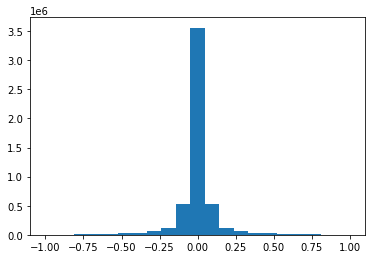

In [23]:
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

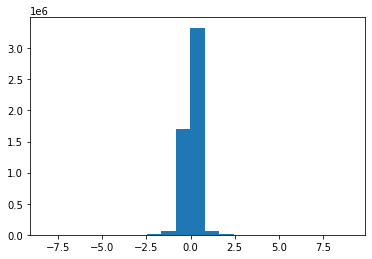

In [24]:
gather_scaled = gather.copy()
gather_scaled.scale_maxabs(q_min=0.01, q_max=0.99)
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

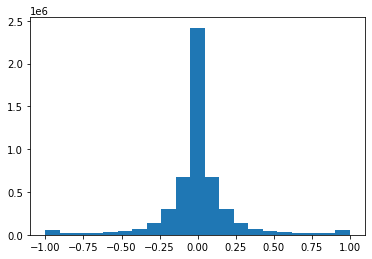

In [25]:
gather_scaled = gather.copy()
gather_scaled.scale_maxabs(q_min=0.01, q_max=0.99, clip=True)
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

#### <i>scale_minmax </i>

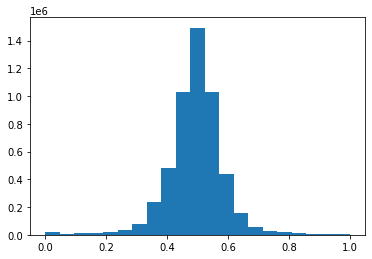

In [26]:
gather_scaled = gather.copy()

gather_scaled.scale_minmax()
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

#### <i>qet_quantile </i>

return quantile
убрать в низ блока нормализации
упомянуть не более

In [27]:
gather.get_quantile(0.01)

-1.5902090072631836

could return requested quantile of each trace in Gather if `tracewise=True`

In [28]:
gather.get_quantile(0.01, tracewise=True)

array([ -6.154593  ,  -5.3934984 , -10.467414  , ...,  -0.62188524,
        -1.6118428 ,  -0.5934124 ], dtype=float32)

could use Survey statistic if its already calculated with `Survey.collect_stats()` <br>
`gather.get_quantile(0.01, use_global=True)`

In [29]:
survey.collect_stats()
gather.get_quantile(0.01, use_global=True)

Calculating statistics for survey small_survey:   0%|          | 0/8640 [00:00<?, ?it/s]

-1.6220418214797974

### Muting

subblock with `mute` and `create_muter` methods

First create `Muter` object with `create_muter` method

only `from_point` mode explain

Trace with offset from 127 m to 4949 m presented only.


In [30]:
gather_muted = gather.copy()
offsets = [127, 1500, 2500, 4949]
times = [500, 2000, 2000, 6000]
points = {'offsets': offsets, 'times': times}
muter = gather_muted.create_muter('points', **points)

Second mute еру traces in `Gather` with `Muter` object

In [31]:
gather_muted.mute(muter, fill_value=0)

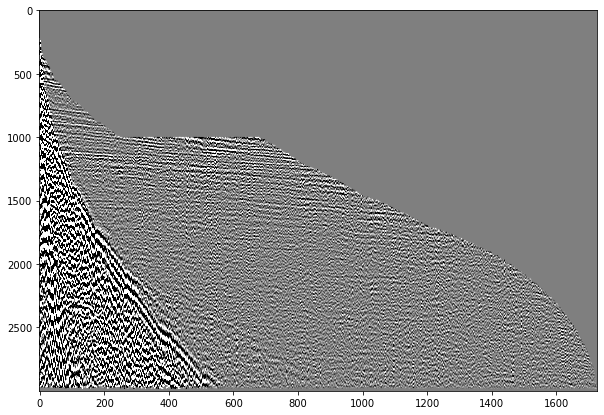

In [32]:
gather_muted.plot()

There are a bit confused to pick point by this plot.
Samples on the Y axis and sequence number of the trace on the X axis.
To convert times to samples we could divide times by samples rate. But convert 

We shows only one mode of muting in this tutorial. To get more information about `first_breaks` and `file` modes read [documentation] of SeismicPro 2.0

### Conclusion

I glad that you read it again. Hope you read both Survey and Gather tutorial and have intuition how SeismicPro works with seismic data.

I don't touch many methods of Gather class, because this methods wants deep understanding of seismic. You could read documention to learn more about it.
Also, we prepare some real-world tasks with SeismicPro and you acquaint [here]
If you ready to resolve end-to-end ML tasks with seismic data be great to check othe tutorials.

If you still have any question you could free contact with our team by [...].

To return to tutorials list [click here]